In [3]:
import pandas as pd
import numpy as np

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
import json
import pandas as pd

with open('/kaggle/input/flicktime/movielens1.json', 'r') as f:
    data = json.load(f)

tmdb_data = pd.json_normalize(data)

In [6]:
tmdb_data.shape

(26745, 29)

In [7]:
genome_scores = pd.read_csv('/kaggle/input/flicktime/genome_scores.csv')
genome_tags = pd.read_csv('/kaggle/input/flicktime/genome_tags.csv')
link = pd.read_csv('/kaggle/input/flicktime/link.csv')
movie = pd.read_csv('/kaggle/input/flicktime/movie.csv')
rating = pd.read_csv('/kaggle/input/flicktime/rating.csv')
tag = pd.read_csv('/kaggle/input/flicktime/tag.csv')

In [8]:
genome_scores.shape
genome_scores.head()

(11709768, 3)

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [9]:
genome_tags.shape
genome_tags.head()

(1128, 2)

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [10]:
link.shape
link.head()

(27278, 3)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [11]:
movie.shape
movie.head()

(27278, 3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
rating.shape
rating.head()

(20000263, 4)

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [13]:
len(set(rating.userId.values))

138493

In [14]:
tag.shape
tag.head()

(465564, 4)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [15]:
tmdb_data.isna().sum()/tmdb_data.shape[0] * 100

adult                                    0.000000
backdrop_path                           11.751729
budget                                   0.000000
genres                                   0.000000
homepage                                 0.000000
id                                       0.000000
imdb_id                                  0.000000
original_language                        0.000000
original_title                           0.000000
overview                                 0.000000
popularity                               0.000000
poster_path                              1.439521
production_companies                     0.000000
production_countries                     0.000000
release_date                             0.000000
revenue                                  0.000000
runtime                                  0.000000
spoken_languages                         0.000000
status                                   0.000000
tagline                                  0.000000


In [16]:
tmdb_data.drop(['belongs_to_collection', 'belongs_to_collection.backdrop_path', 'belongs_to_collection.poster_path',
               'belongs_to_collection.name','belongs_to_collection.id'],inplace = True, axis = 1)

In [17]:
tmdb_data.dropna(inplace = True)

In [18]:
tmdb_data.isna().sum()

adult                   0
backdrop_path           0
budget                  0
genres                  0
homepage                0
id                      0
imdb_id                 0
original_language       0
original_title          0
overview                0
popularity              0
poster_path             0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
video                   0
vote_average            0
vote_count              0
dtype: int64

In [19]:
movie_ids = tmdb_data.id.values

In [20]:
movie_ids.shape

(23584,)

In [21]:
link.shape

(27278, 3)

In [22]:
merged_df = tmdb_data.merge(link,left_on='id', right_on = 'tmdbId')

In [23]:
merged_df.shape

(23616, 27)

In [24]:
merged_df.isna().sum()

adult                   0
backdrop_path           0
budget                  0
genres                  0
homepage                0
id                      0
imdb_id                 0
original_language       0
original_title          0
overview                0
popularity              0
poster_path             0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
video                   0
vote_average            0
vote_count              0
movieId                 0
imdbId                  0
tmdbId                  0
dtype: int64

In [25]:
movie_ids = merged_df.movieId.values

In [26]:
len(movie_ids)

23616

In [27]:
rating.shape

(20000263, 4)

In [28]:
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [30]:
merged_rating = rating.loc[rating['movieId'].isin(movie_ids)]

In [31]:
merged_rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [32]:
merged_df.genres[:5]

0    [{'id': 16, 'name': 'Animation'}, {'id': 12, '...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2    [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4    [{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...
Name: genres, dtype: object

In [30]:
# !pip install tensorflow

<h1> New model

In [33]:
new_moviedf = merged_df[['overview', 'id', 'movieId', 'title', 'vote_count', 'vote_average'
                        , 'popularity', 'genres']]

In [34]:
# create a list of all unique genres
genres = []
for movie_genres in new_moviedf['genres']:
    for genre in movie_genres:
        if genre['name'] not in genres:
            genres.append(genre['name'])

In [35]:
genres, len(genres)

(['Animation',
  'Adventure',
  'Family',
  'Comedy',
  'Fantasy',
  'Romance',
  'Drama',
  'Action',
  'Crime',
  'Thriller',
  'Horror',
  'History',
  'Science Fiction',
  'Mystery',
  'War',
  'Music',
  'Documentary',
  'Western',
  'TV Movie'],
 19)

In [36]:
# create a binary column for each genre indicating whether the movie belongs to that genre or not
for genre in genres:
    new_moviedf[genre] = new_moviedf['genres'].apply(lambda x: genre in [y['name'] for y in x]).astype(int)

/tmp/ipykernel_31/2730556766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_moviedf[genre] = new_moviedf['genres'].apply(lambda x: genre in [y['name'] for y in x]).astype(int)
/tmp/ipykernel_31/2730556766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_moviedf[genre] = new_moviedf['genres'].apply(lambda x: genre in [y['name'] for y in x]).astype(int)
/tmp/ipykernel_31/2730556766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [37]:
new_moviedf.head()

,overview,id,movieId,title,vote_count,vote_average,popularity,genres,Animation,Adventure,...,Thriller,Horror,History,Science Fiction,Mystery,War,Music,Documentary,Western,TV Movie
0,"Led by Woody, Andy's toys live happily in his ...",862,1,Toy Story,16648,7.969,89.439,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",1,1,...,0,0,0,0,0,0,0,0,0,0
1,When siblings Judy and Peter discover an encha...,8844,2,Jumanji,9580,7.238,14.453,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",0,1,...,0,0,0,0,0,0,0,0,0,0
2,A family wedding reignites the ancient feud be...,15602,3,Grumpier Old Men,325,6.458,6.813,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Cheated on, mistreated and stepped on, the wom...",31357,4,Waiting to Exhale,132,6.273,8.913,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",0,0,...,0,0,0,0,0,0,0,0,0,0
4,Just when George Banks has recovered from his ...,11862,5,Father of the Bride Part II,640,6.243,9.395,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
new_moviedf.columns

Index(['overview', 'id', 'movieId', 'title', 'vote_count', 'vote_average',
       'popularity', 'genres', 'Animation', 'Adventure', 'Family', 'Comedy',
       'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'History', 'Science Fiction', 'Mystery', 'War', 'Music', 'Documentary',
       'Western', 'TV Movie'],
      dtype='object')

# Now, let's split the ratings dataset into training and testing sets.

In [39]:
# split the ratings dataset into training and testing sets
from sklearn.model_selection import train_test_split

train_ratings_df, test_ratings_df = train_test_split(merged_rating, test_size=0.2, random_state=42)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Next, we need to preprocess the training data to create input and output arrays for training the neural network.

In [40]:
# create input and output arrays for training the neural network
train_user_ids = np.array(train_ratings_df['userId'])
train_movie_ids = np.array(train_ratings_df['movieId'])
train_ratings = np.array(train_ratings_df['rating'])

num_users = max(train_user_ids) + 1
num_movies = max(train_movie_ids) + 1

train_input = [train_user_ids, train_movie_ids]

train_output = train_ratings

# Now, we can build the neural network using Keras.

In [41]:
# build the neural network
from keras.layers import Input, Embedding, Flatten, Dense, Dropout, Concatenate
from keras.models import Model

In [42]:
# user input
user_input = Input(shape=[1], name='user_input')
user_embedding = Embedding(num_users, 10, name='user_embedding')(user_input)
user_embedding = Dropout(0.2)(user_embedding)
user_embedding = Flatten()(user_embedding)

In [43]:
# movie input
movie_input = Input(shape=[1], name='movie_input')
movie_embedding = Embedding(num_movies, 10, name='movie_embedding')(movie_input)
movie_embedding = Dropout(0.2)(movie_embedding)
movie_embedding = Flatten()(movie_embedding)

In [44]:
# concatenate user and movie embeddings
concat = Concatenate()([user_embedding, movie_embedding])

In [45]:
# hidden layers
fc1 = Dense(128, activation='relu')(concat)
fc1 = Dropout(0.2)(fc1)
fc2 = Dense(32, activation='relu')(fc1)

In [46]:
# output layer
output = Dense(1, activation='linear')(fc2)

In [47]:
# compile the model
model = Model([user_input, movie_input], output)
model.compile(loss='mean_squared_error', optimizer='adam')

# Next, we can train the neural network using the training data.

In [49]:
# train the neural network
hist = model.fit(train_input, train_output, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
111859/111859 [==============================] - 522s 5ms/step - loss: 0.7690 - val_loss: 0.7272
Epoch 2/10
111859/111859 [==============================] - 522s 5ms/step - loss: 0.7151 - val_loss: 0.7094
Epoch 3/10
111859/111859 [==============================] - 503s 5ms/step - loss: 0.6998 - val_loss: 0.7115
Epoch 4/10
111859/111859 [==============================] - 496s 4ms/step - loss: 0.6916 - val_loss: 0.7252
Epoch 5/10
111859/111859 [==============================] - 493s 4ms/step - loss: 0.6862 - val_loss: 0.7180
Epoch 6/10
111859/111859 [==============================] - 514s 5ms/step - loss: 0.6825 - val_loss: 0.7136
Epoch 7/10
111859/111859 [==============================] - 510s 5ms/step - loss: 0.6796 - val_loss: 0.7214
Epoch 8/10
111859/111859 [==============================] - 511s 5ms/step - loss: 0.6772 - val_loss: 0.7238
Epoch 9/10
111859/111859 [==============================] - 518s 5ms/step - loss: 0.6751 - val_loss: 0.7355
Epoch 10/10
111859/111859 [=

# test model

In [50]:
# predict ratings for the testing data
test_user_ids = np.array(test_ratings_df['userId'])
test_movie_ids = np.array(test_ratings_df['movieId'])

test_input = [test_user_ids, test_movie_ids]

test_predictions = model.predict(test_input).flatten()

124288/124288 [==============================] - 214s 2ms/step


In [51]:
test_predictions[:5]

array([2.77633  , 3.860946 , 3.7058482, 3.4168017, 3.4601068],
      dtype=float32)

# Evaluate model

In [53]:
# evaluate the performance of the recommender system
from sklearn.metrics import mean_squared_error

test_ratings = np.array(test_ratings_df['rating'])

mse = mean_squared_error(test_ratings, test_predictions)
rmse = np.sqrt(mse)

print('MSE:', mse)
print('RMSE:', rmse)

MSE: 0.7190985808913103
RMSE: 0.8479968047648


# Pickling the model

Text(0.5, 1.0, 'Model Learning Curve')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Loss')

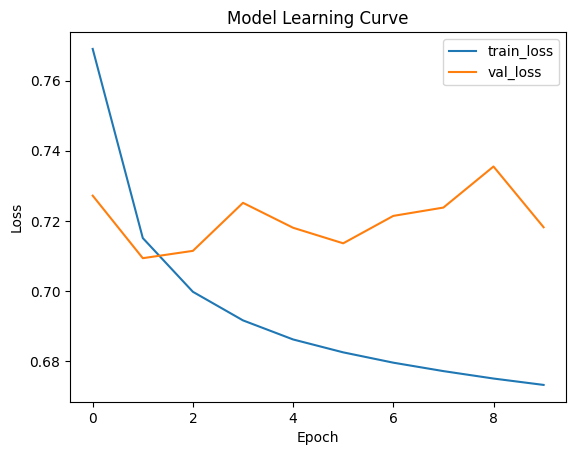

In [57]:
import matplotlib.pyplot as plt

# Plot the training and validation loss over epochs
plt.plot(hist.history['loss'], label='train_loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('Model Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [54]:
import pickle
pickle.dump(model, open('model_nn_84.pkl','wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......concatenate
.........vars
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......dropout_2
.........vars
......embedding
.........vars
............0
......embedding_1
.........vars
............0
......flatten
.........vars
......flatten_1
.........vars
......input_layer
.........vars
......input_layer_1
.........vars
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json               

# Kmeans and Autoencoders

In [55]:
# Create a MultiLabelBinarizer object to one-hot encode the genres column
mlb = MultiLabelBinarizer()

NameError: name 'MultiLabelBinarizer' is not defined

In [48]:
new_moviedf.head()

,overview,id,movieId,title,vote_count,vote_average,popularity,genres,Animation,Adventure,...,Thriller,Horror,History,Science Fiction,Mystery,War,Music,Documentary,Western,TV Movie
0,"Led by Woody, Andy's toys live happily in his ...",862,1,Toy Story,16648,7.969,89.439,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",1,1,...,0,0,0,0,0,0,0,0,0,0
1,When siblings Judy and Peter discover an encha...,8844,2,Jumanji,9580,7.238,14.453,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",0,1,...,0,0,0,0,0,0,0,0,0,0
2,A family wedding reignites the ancient feud be...,15602,3,Grumpier Old Men,325,6.458,6.813,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Cheated on, mistreated and stepped on, the wom...",31357,4,Waiting to Exhale,132,6.273,8.913,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",0,0,...,0,0,0,0,0,0,0,0,0,0
4,Just when George Banks has recovered from his ...,11862,5,Father of the Bride Part II,640,6.243,9.395,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# Select the features we want to use for training the model
selected_features = ['overview', 'popularity', 'vote_average', 'movieId'] + list(mlb.classes_)

In [53]:
merged_rating.columns
new_moviedf.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

Index(['overview', 'id', 'movieId', 'title', 'vote_count', 'vote_average',
       'popularity', 'genres', 'Animation', 'Adventure', 'Family', 'Comedy',
       'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'History', 'Science Fiction', 'Mystery', 'War', 'Music', 'Documentary',
       'Western', 'TV Movie', 'genres_ids', ' ', 'A', 'C', 'D', 'F', 'H', 'M',
       'R', 'S', 'T', 'V', 'W', 'a', 'c', 'd', 'e', 'h', 'i', 'l', 'm', 'n',
       'o', 'r', 's', 't', 'u', 'v', 'y', '|'],
      dtype='object')

In [ ]:
new_merged_df = merged_rating.merge(new_moviedf[selected_features], on = 'movieId', how = 'left')

In [ ]:
# Merge the ratings and movies DataFrames on the movieId column
merged_df1 = pd.merge(merged_rating, new_moviedf[selected_features], on='movieId', how='left')

In [ ]:
# Group the merged DataFrame by userId and movieId, and calculate the mean rating for each user-movie pair
grouped_df = merged_df.groupby(['userId', 'movieId']).mean().reset_index()

In [ ]:
# Pivot the grouped DataFrame to create a user-movie rating matrix
ratings_matrix = grouped_df.pivot(index='userId', columns='movieId', values='rating').fillna(0)

In [ ]:
# Convert the ratings matrix to a numpy array
ratings_array = ratings_matrix.values

In [ ]:
# Normalize the ratings array
mean_ratings_array = np.mean(ratings_array, axis=1)
normalized_ratings_array = ratings_array - mean_ratings_array.reshape(-1, 1)

In [ ]:
# Define the dimensions of the input and output layers of the autoencoder
input_dim = normalized_ratings_array.shape[1]
output_dim = input_dim

In [ ]:
# Define the dimensions of the hidden layers of the autoencoder
encoding_dim_1 = 256
encoding_dim_2 = 128

In [ ]:
# Define the input layer
input_layer = Input(shape=(input_dim,))

In [ ]:
# Define the first hidden layer
hidden_layer_1 = Dense(encoding_dim_1, activation='relu')(input_layer)

# Define the second hidden layer
hidden_layer_2 = Dense(encoding_dim_2, activation='relu')(hidden_layer_1)

# Define the third hidden layer (the bottleneck layer)
bottleneck_layer = Dense(32, activation='relu')(hidden_layer_2)

# Define the fourth hidden layer
hidden_layer_4 = Dense(encoding_dim_2, activation='relu')(bottleneck_layer)

# Define the fifth hidden layer
hidden_layer_5 = Dense(encoding_dim_1, activation='relu')(hidden_layer_4)

# Define the output layer
output_layer = Dense(output_dim, activation='linear')(hidden_layer_5)

In [ ]:
# Define the autoencoder model
autoencoder = Model(input_layer, output_layer)

In [ ]:
# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
# Train the autoencoder model
autoencoder.fit(normalized_ratings_array, normalized_ratings_array, epochs=50, batch_size=256)

In [ ]:
# Define a function to get encoded movie features
def get_movie_features(movie_ids):
    movie_features = movie_autoencoder.encoder(movies[movies['movieId'].isin(movie_ids)].drop(columns=['movieId','title','genres']).values)
    return movie_features.numpy()